# Manejo de datos

In [80]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Lo primero que se realiza es la lectura de los csv

In [61]:
ratings_file = pd.read_csv('BX-Book-Ratings.csv', sep=';')
books_file = pd.read_csv('BX-Books.csv', sep = ';', error_bad_lines=False, low_memory=False)
users_file = pd.read_csv('BX-Users.csv', sep = ';')

Los URL de las imagenes puede que no sean de interes por lo que se eliminan

In [62]:
books_file.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1, inplace=True)
books_file.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp Company


## Forma y tipo informacion disponible

In [63]:
ratings_file['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [17]:
books_file['Year-Of-Publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958', '1974',
       '1976', '1971', '1977', '1975', '1965', '1941', '1970', '1962',
       '1973', '1972', '1960', '1966', '1920', '1956', '1959', '1953',
       '1951', '1942', '1963', '1964', '1969', '1954', '1950', '1967',
       '2005', '1957', '1940', '1937', '1955', '1946', '1936', '1930',
       '2011', '1925', '1948', '1943', '1947', '1945', '1923', '2020',
       '1939', '1926', '1938', '2030', '1911', '1904', '1949', '1932',
       '1928', '1929', '1927', '1931', '1914', '2050', '1934', '1910',
       '1933', '1902', '1924', '1921', '1900', '2038', '2026', '1944',
       '1917', '1901', '2010', '1908', '1906', '1935', '1806', '2021',
       '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909', '2008',

Es claro que existen valores incorrectos en los años: DK Publishing Inc, Gallimard y 0

In [64]:
users_file['User-ID'].unique()

array([     1,      2,      3, ..., 278856, 278857, 278858])

En esta parte se corrige el problema del año de publicacion

In [86]:
# badyear = books_file['Year-Of-Publication'] == 'DK Publishing Inc'
books_file[books_file['Year-Of-Publication'] == 'DK Publishing Inc']
books_file.loc[books_file.ISBN == '078946697X','Year-Of-Publication'] = 2000
books_file.loc[books_file.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books_file.loc[books_file.ISBN == '078946697X','Book-Author'] = 'James Buckley (Jr.)'
books_file.loc[books_file.ISBN == '0789466953','Year-Of-Publication'] = 2000
books_file.loc[books_file.ISBN == '0789466953','Book-Author'] = 'James Buckley (Jr.)'
books_file.loc[books_file.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"

books_file[books_file['Year-Of-Publication'] == 'Gallimard']
books_file.loc[books_file.ISBN == '2070426769','Year-Of-Publication'] = 2003
books_file.loc[books_file.ISBN == '2070426769','Book-Author'] = 'Jean-Marie Gustave'

In [87]:
books_file[books_file['ISBN'] == '078946697X']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209550,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",James Buckley (Jr.),2000,DK Publishing Inc


In [88]:
books_file[books_file['ISBN'] == '0789466953']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
221691,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley (Jr.),2000,DK Publishing Inc


#### Luego es necesario revisar que tanto datos tienen como punto de publicacion el año 0

In [66]:
books_file[books_file['Year-Of-Publication'] == '0']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH"
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV)
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri
641,0345251733,Rainbow the Stormy Life of Judy Garland,Christopher Finch,0,Ballantine Books
646,0590021117,Little House On the Prairie,Laura Ingall Wilder,0,Scholastic Inc
728,2070362388,Ravage,Rene Barjavel,0,Gallimard French
732,2266033689,Le Diable Au Corps,Raymond Radiguet,0,Presses Pocket French
735,2070334368,La Guerre Des Boutons,Pergaud,0,Livre de Poche


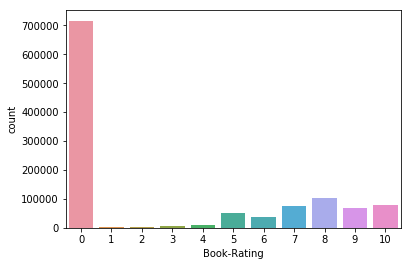

In [90]:
sns.countplot(df['Book-Rating'])
plt.show()

Claramente puede apreciarse que existe una gran cantidad de peliculas que les han asignado rating igual a cero o que simplemente no poseen rating.
#### Para efectos practicos se asumira que se les ha asignado una nota de cero

#  Creacion de columnas separadas que contengan el país, ciudad y región de cada usuario. 


In [69]:
users_file[['Ciudad','Region','Pais']] = users_file['Location'].str.split(',', n=2,	 expand = True)
users_file.drop('Location', axis='columns', inplace= True)
users_file.head()

,User-ID,Age,Ciudad,Region,Pais
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


## Cuáles son los libros con más ratings?


In [98]:
df = ratings_file.merge(books_file[['ISBN','Book-Title','Book-Author','Year-Of-Publication']], on= ['ISBN'], how = 'left')
df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001


In [91]:
#se secciona el dataset creado en el paso anterior para enfocarnos solamente en book-rating y book-title
#luego se le aplica un agrupamiento por Book-Title y se cuenta las veces que la pelicula sido evaluada.
df1 = df[['Book-Rating','Book-Title']].groupby('Book-Title').count()

In [93]:
#Se ordena por Book-Rating y se especifica que sea de forma descendente
df1.sort_values(by=['Book-Rating'], inplace=True, ascending = False)
df1.head()

,Book-Rating
Book-Title,
Wild Animus,2502
The Lovely Bones: A Novel,1295
The Da Vinci Code,898
A Painted House,838
The Nanny Diaries: A Novel,828


Este es el resultado de los Libros con mayor ratings evaluados.

# ¿Cuál es el top 10 de libros con mejores ratings?


## Para esta pregunta se pueden considerar dos escenarios:
1. Simplemente obtener el rating promedio de todos los libros y presentar los primeros 10 resultados
2. Tomar en cuenta que no todos los libros tienen el mismo numero de ratings y que muchos libros pueden tener un valor de 10 (el maximo valor posible). Por lo tanto, seria necesario determinar a partir de que cantidad de ratings se tomara la linea base. (Por cuestiones de tiempo este caso no se trabajará en el documento)

### Escenario 1

In [106]:
df2 = df[['Book-Rating','Book-Title']].groupby('Book-Title').mean()
df2.sort_values(by='Book-Rating', inplace =True, ascending = False)
df2.head(10)

,Book-Rating
Book-Title,
Montesquieu: The Spirit of the Laws (Cambridge Texts in the History of Political Thought),10.0
Courage: The Joy of Living Dangerously,10.0
The Vanished Priestess : An Annie Szabo Mystery,10.0
Joan Miro: 1893-1983 (Basic Series),10.0
Game and Hunting,10.0
The Vampire's Apprentice,10.0
The Vampire in Lore and Legend (Dover Books on Anthropology and Folklore),10.0
"The Vampire in Literature: A Critical Bibliography (Studies in Speculative Fiction, No 21)",10.0
Eleanor of Aquitaine,10.0


# Dataset que pueda ser usado para entrenar un modelo de agrupación como KNN o un sistema de recomendaciones. 

## Para esta pregunta se necesita combinar los archivos entregados para poder crear un dataset capaz de ser entrenado por KNN. 


Para este caso es importante considerar cuales seran las X(INPUTS) & Y(OUTPUTS).
El dataframe df creado anteriormente puede servir para dicho proposito ya que incluye las siguientes columnas:

In [113]:
df.columns

Index(['User-ID', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication'],
      dtype='object')

Para este caso, la variable a proyectar seria "Book-rating" y los inputs X serian el resto de las columnas.
El modelo luego de ser entrenado, predeciría el rating con el que se evaluaria un libro dependiendo del usuario que lo evalua. En otras palabras, al correr el modelo y entregarle como parametros un USER-ID y Book-Title, predecirá el rating que dicho usuario daria al libro ingresado.

## Definicion KNN

k-Nearest-Neighbors (k-NN) es un modelo de aprendizaje de máquinas supervisado. El aprendizaje supervisado es cuando un modelo aprende a partir de datos que ya están etiquetados. Un modelo de aprendizaje supervisado toma un conjunto de objetos de entrada (X) y valores de salida(Y). El modelo luego se entrena con esos datos para aprender a mapear las entradas a la salida deseada, de manera que pueda aprender a hacer predicciones sobre datos no vistos.



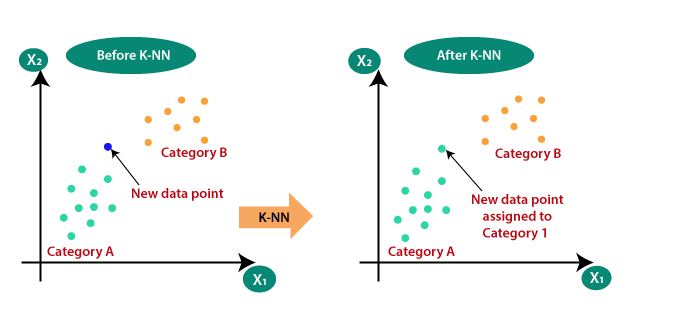

Los modelos KNN funcionan tomando un punto de datos y mirando los puntos de datos etiquetados más cercanos a la "k". Al punto de datos se le asigna la etiqueta de la mayoría de los "k" puntos más cercanos.
Por ejemplo, si k = 10, y 4 de los puntos son "rojos" y 6 son "amarillos", entonces el punto de datos en cuestión sería etiquetado como "amarillos", ya que "amarillo"  representa la mayoría.
Para realizar modelos KNN se puede utilizar la libreria Scikit-learn, la cual es una biblioteca de aprendizaje automático para Python. 

Ahora, como se mencino anteriormente, dividimos nuestro df en entradas (X) y nuestro objetivo (y). Nuestra entrada será todas las columnas excepto "Book-Ratings" porque "Book-Rating" es lo que se pretende predecir. Por lo tanto, "Book-Rating" es el objetivo.


# Separar inputs-outputs

In [125]:
x = df.drop(['Book-Rating'], axis=1)
x.head()

,User-ID,Book-Title,Book-Author,Year-Of-Publication
0,276725,Flesh Tones: A Novel,M. J. Rose,2002
1,276726,Rites of Passage,Judith Rae,2001
2,276727,The Notebook,Nicholas Sparks,1996
3,276729,Help!: Level 1,Philip Prowse,1999
4,276729,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001


In [127]:
#output
y = df['Book-Rating'].values
y[0:10]

array([ 0,  5,  0,  3,  6,  0,  8,  6,  7, 10])

A partir de este punto, se divide el conjunto de datos en datos de entrenamiento y datos de prueba. Los datos de entrenamiento son los datos de los que el modelo aprenderá. Los datos de prueba son los datos que usaremos para ver qué tan bien se desempeña el modelo con los datos no vistos.
Scikit-learn tiene una función que podemos usar llamada 'train_test_split' que nos facilita la división de nuestro conjunto de datos en datos de entrenamiento y de pruebas.

La función train_test_split toma 5 parámetros. Los dos primeros parámetros son X y Y. Tambien, es necesario  establecer un 'test_size', por ejemplo en 0.15. Esto significa que el 15% de todos los datos se utilizarán para las pruebas, lo que deja el 85% de los datos como datos de entrenamiento para que el modelo aprenda de ellos. La función incluye tambien el paramentro 'random_state' el cual asegura que si se reproduce la metodologia, se puedan obtener los mismos resultados.

La funcion se puede denotar como se muestra a continuación.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1, stratify=y)


# Construcción del modelo

In [128]:
from sklearn.neighbors import KNeighborsClassifier

#### El codigo que se podria utilizar para la creación y desarrollo del modelo es el siguiente.
Clasificacor KNN:

knn = KNeighborsClassifier(n_neighbors = 3)

Entrenamiento del modelo:

knn.fit(X_train,y_train)


Primero, se crea un nuevo clasificador KNN y se parametriza 'n_vecinos' en un valor N. Lo anterior, significa que si al menos mas de la mitad de los N puntos más cercanos a un nuevo punto de datos pertenecen a cierto rating (0-10)  entonces el nuevo punto de datos será etiquetado segun ese rating. En otras palabras, un nuevo punto de datos está etiquetado con la mayoría de los puntos más cercanos.
En el ejemplo, se establece  'n_vecinos' igual a 3 como punto de partida. Luego, se debe  entrenar el modelo utilizando la función 'fit'.

# Prueba del modelo
Una vez que el modelo está entrenado, se puede utilizar la función de "predict" para hacer predicciones sobre nuestros datos de prueba.

knn.predict(X_test)

De esta forma, el modelo predecirá el resultado deseado.

Finalmente para conocer la precisión del modelo en el conjunto de pruebas se puede utilizar la función "score" en la cual se ingresan la entrada y datos objetivo para conocer cómo se ajustan las predicciones de nuestro modelo a los resultados reales.

knn.score(X_test, y_test)

Score prenta  un numero entre 0 y 1 que indicará lo bien que nuestro modelo se ha desempeñado. 

Finalmente, existen metodos que pueden aplicarase para mejorar el score entre ellos se encuentran:

1.k-Fold Cross-Validation: le brinda al modelo la oportunidad de probar con múltiples splits para que se pueda tener una mejor idea de cómo se desempeñará el modelo con datos no vistos.
2.Utilizar GridSearchCV para Hypertunning: se entrena el modelo varias veces en un rango de parámetros previamente especificados . De esta manera, se logra probar el modelo con cada parámetro y calcular los valores óptimos para obtener resultados más precisos.

### Es importante tener en cuenta que los pasos descritos representan de manera general el pipeline a seguir en un modelo KNN y no necesariamente un pseudocodigo para la proyección de los ratings.